# Word Embedding

### Blog: 

In [30]:
import keras
keras.__version__

'2.1.6'

In [31]:
import pandas as pd 
data = pd.read_csv("questions.csv")
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [33]:
labels = []
texts = []

for index, row in data.iterrows():
        labels.append(row["is_duplicate"])
        questions = str(row["question1"]) + " " + str(row["question2"])
        texts.append(questions)

In [34]:
print(len(labels))
print(len(texts))

404351
404351


In [51]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 500  # We will cut the questions after 100 words (presumably this will keep all the words)
training_samples = 100000  # We will be training on 100,000 samples
validation_samples = 100000  # We will be validating on 100,000 samples
max_words = 5000  # We will only consider the top 5,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 95603 unique tokens.
Shape of data tensor: (404351, 500)
Shape of label tensor: (404351,)


In [48]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)

from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 500, 8)            80000     
_________________________________________________________________
flatten_11 (Flatten)         (None, 4000)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 4001      
Total params: 84,001
Trainable params: 84,001
Non-trainable params: 0
_________________________________________________________________
Train on 100000 samples, validate on 100000 samples
Epoch 1/10
100000/100000 [==============================] - 8s 78us/step - loss: 0.6601 - acc: 0.6306 - val_loss: 0.6589 - val_acc: 0.6306
Epoch 2/10
100000/100000 [==============================] - 8s 77us/step - loss: 0.6542 - acc: 0.6305 - val_loss: 0.6627 - val_acc: 0.6301
Epoch 3/10
100000/100000 [==============================] - 8s 77us/step

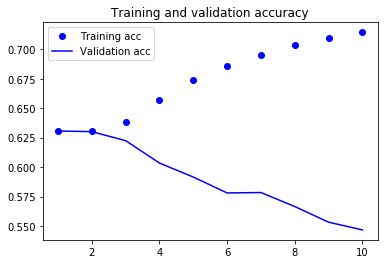

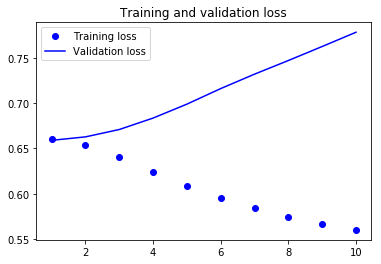

In [50]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()